# Градиентный бустинг для Классификации

В текущем ДЗ Вам предстоит ознакомиться и попрактиковаться с реализацией градиентного бустинга на примере

## Создадим искусственный сет для классификации

In [2]:
from sklearn.datasets import make_classification

In [3]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1, weights = [0.3])
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


## Задание 0. (0.5 балла)
Оцените количество уникальных классов в выборки и их количество. Ответ выведите ниже. Является ли выборка сбалансированной?

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
import numpy as np
np.unique(y)

array([0, 1])

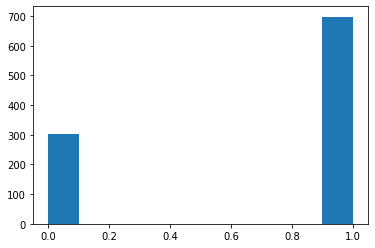

In [16]:
plt.hist(y)
plt.show()

In [12]:
q_0 = (y==0).sum()
q_1 = (y==1).sum()
print("Количество элементов 0 класса равно {}, а 1 класса равно {}".format(q_0, q_1))

Количество элементов 0 класса равно 302, а 1 класса равно 698


Всего два уникальных класса в выборке, количество элементов в классе 0 равно 302, а в классе 1 равно 698. В целом выборка сбалансирована.

### Задание 1. (1 балл)
1. Выполните кросс-валидацию со стратификацией.

Для этого сперва необходимо инициализировать метод RepeatedStratifiedKFold со следующими параметрами: n_splits=10, n_repeats=3, random_state=1. 

Затем инициализировать метод cross_val_score (сохраните его в переменную n_scores), передать в него вашу модель, X, y и cv=cv, где cv это инициализированный ранее RepeatedStratifiedKFold. Также укажите n_jobs = -1 и error_score='raise'.

In [17]:
# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
model = GradientBoostingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.918 (0.028)


### Задание 2. (6 заданий по 0,5 балла)
1. Разделите ваш датасет (X,y) на тренировочную и тестовые выборки c test_size=0.2, random_state=1.

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

2. Инициализируйте модель GradientBoostingClassifier

In [24]:
model = GradientBoostingClassifier()

3. Обучите модель при помощи метода fit() на тренировочных данных (пока не указывайте дополнительных настроек модели, передайте в метод только X_train, y_train)

In [25]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

4. Сделайте предсказания при помощи метода predict на тестовом наборе данных и сохраните предсказания в переменную y_predicted

In [45]:
y_predicted = model.predict(X_val)

5. При помощи метода confusion_matrix из sklearn выведите матрицу ошибок алгоритма на тестовом наборе данных (между y_test и y_predicted). Можете (по желанию) ее визуализировать при помощи библиотеки seaborn - сиборн удобен для визуализации матриц ошибок.

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

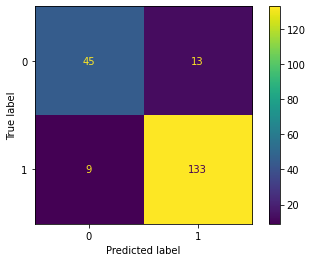

In [47]:
matrix = confusion_matrix(y_val, y_predicted)
matrix_plot = ConfusionMatrixDisplay(matrix).plot()

6. Посчитайте метрику ROC AUC и F1 score на тестовом наборе данных (между y_test и y_predicted)

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [50]:
rcs = roc_auc_score(y_val, y_predicted)
f1s = f1_score(y_val, y_predicted)
print("ROC AUC = {:.2f}, F1-Score = {:.2f}".format(rcs, f1s))

ROC AUC = 0.86, F1-Score = 0.92


## Задание 3 (3 балла)

До этого мы пользовались с Вами методом "из коробки". Это не есть хорошо, поэтому поиграйте с настройками гиперпараметров алгоритма (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), чтобы улучшить вид confusion matrix, а также roc_auc_score и f1_score

ROC AUC = 0.91, F1-Score = 0.95


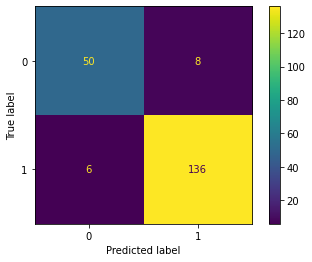

In [90]:
model_improved = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.75,
    max_depth=10,
    random_state=1
    )

model_improved.fit(X_train, y_train)
y_predicted_improved = model_improved.predict(X_val)

matrix_improved = confusion_matrix(y_val, y_predicted_improved)
matrix_plot_improved = ConfusionMatrixDisplay(matrix_improved).plot()

rcs_improved = roc_auc_score(y_val, y_predicted_improved)
f1s_improved = f1_score(y_val, y_predicted_improved)
print("ROC AUC = {:.2f}, F1-Score = {:.2f}".format(rcs_improved, f1s_improved))